<a href="https://colab.research.google.com/github/lavanya957/loan-approval-prediction-model/blob/main/major_pro_loan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df=pd.read_csv("/content/loan-predictionUC.csv (1).csv")

In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
df.shape

(614, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
gen=df["Gender"].mode()
gen[0]

'Male'

In [ ]:
mar=df["Married"].mode()
mar[0]

'Yes'

In [ ]:
dep=df["Dependents"].mode()
dep[0]

'0'

In [ ]:
slefe=df["Self_Employed"].mode()
slefe[0]

'No'

In [ ]:
loana=df["LoanAmount"].median()
loana

128.0

In [ ]:
lat=df["Loan_Amount_Term"].mean()
lat

342.0

In [ ]:

ch=df["Credit_History"].mode()
ch[0]

1.0

In [ ]:
new_df=df.fillna({"Gender":gen[0],"Married":mar[0],"Dependents":dep[0],"Self_Employed":slefe[0],"LoanAmount":loana,"Loan_Amount_Term":lat,"Credit_History":ch[0]})

In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
df["nGender"]=labelencoder.fit_transform(df["Gender"])
df["nGender"].unique()

array([1, 0, 2])

In [ ]:
labelencoder=LabelEncoder()
df["nMarried"]=labelencoder.fit_transform(df["Married"])
df["nMarried"].unique()

array([0, 1, 2])

In [ ]:
df["nDependents"]=labelencoder.fit_transform(df["Dependents"])
df["nDependents"].unique()

array([0, 1, 2, 3, 4])

In [ ]:
df["nEducation"]=labelencoder.fit_transform(df["Education"])
df["nEducation"].unique()

array([0, 1])

In [ ]:
df["nSelf_Employed"]=labelencoder.fit_transform(df["Self_Employed"])
df["nSelf_Employed"].unique()

array([0, 1, 2])

In [ ]:
df["nProperty_Area"]=labelencoder.fit_transform(df["Property_Area"])
df["nProperty_Area"].unique()



array([3, 0, 2, 1, 4])

In [ ]:
df["nLoan_Status"]=labelencoder.fit_transform(df["Loan_Status"])
df["nLoan_Status"].unique()

array([1, 0])

In [ ]:
new_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
newd=new_df.drop(["Loan_ID","Gender","Married","Education","Self_Employed","Property_Area","Loan_Status","Dependents"],axis=1)
newd.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,128.0,360.0,1.0
1,4583,1508.0,128.0,360.0,1.0
2,3000,0.0,66.0,360.0,1.0
3,2583,2358.0,120.0,360.0,1.0
4,6000,0.0,141.0,360.0,1.0


In [ ]:
newdf=pd.concat([newd,df["nLoan_Status"],df["nProperty_Area"],df["nSelf_Employed"],df["nEducation"],df["nDependents"],df["nMarried"],df["nGender"]],axis=1)

In [ ]:
newdf.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,nLoan_Status,nProperty_Area,nSelf_Employed,nEducation,nDependents,nMarried,nGender
0,5849,0.0,128.0,360.0,1.0,1,3,0,0,0,0,1
1,4583,1508.0,128.0,360.0,1.0,0,0,0,0,1,1,1
2,3000,0.0,66.0,360.0,1.0,1,3,1,0,0,1,1
3,2583,2358.0,120.0,360.0,1.0,1,3,0,1,0,1,1
4,6000,0.0,141.0,360.0,1.0,1,3,0,0,0,0,1


In [ ]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ApplicantIncome    614 non-null    int64  
 1   CoapplicantIncome  614 non-null    float64
 2   LoanAmount         614 non-null    float64
 3   Loan_Amount_Term   614 non-null    float64
 4   Credit_History     614 non-null    float64
 5   nLoan_Status       614 non-null    int64  
 6   nProperty_Area     614 non-null    int64  
 7   nSelf_Employed     614 non-null    int64  
 8   nEducation         614 non-null    int64  
 9   nDependents        614 non-null    int64  
 10  nMarried           614 non-null    int64  
 11  nGender            614 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 57.7 KB


In [ ]:
x=newdf.drop(columns=["nLoan_Status"],axis=1)
y=newdf["nLoan_Status"]

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
xscaled=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)

In [ ]:
xscaled.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,nProperty_Area,nSelf_Employed,nEducation,nDependents,nMarried,nGender
0,0.070489,0.000000,0.172214,0.74359,1.0,0.75,0.0,0.0,0.00,0.0,0.5
1,0.054830,0.036192,0.172214,0.74359,1.0,0.00,0.0,0.0,0.25,0.5,0.5
2,0.035250,0.000000,0.082489,0.74359,1.0,0.75,0.5,0.0,0.00,0.5,0.5
3,0.030093,0.056592,0.160637,0.74359,1.0,0.75,0.0,1.0,0.00,0.5,0.5
4,0.072356,0.000000,0.191027,0.74359,1.0,0.75,0.0,0.0,0.00,0.0,0.5


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(xscaled,y,test_size=0.2,random_state=2)

In [ ]:
model_params={
    "Randomforest":{
        "model":RandomForestClassifier(),
        "params":{

        }
    },
    "logisticregression":{
        "model":LogisticRegression(),
        "params":{}
    },
    "SVC":{
        "model":SVC(),
        "params":{

        }
    }
}

In [ ]:
scores=[]
for model_name,mp in model_params.items():
  clf=GridSearchCV(mp["model"],mp["params"],cv=5,refit='Accuracy',return_train_score=False)
  clf.fit(x_train,y_train)
  y_train_predicted=clf.predict(x_train)
  y_train_accuracy_score=accuracy_score(y_train,y_train_predicted)
  scores.append({
      "model":model_name,
      "best_score":clf.best_score_,
      "best_params":clf.best_params_,
      "accuracy_score":y_train_accuracy_score
  })
df1=pd.DataFrame(scores,columns=["model","best_score","best_params","accuracy_score"])


In [ ]:
df1

,model,best_score,best_params,accuracy_score
0,Randomforest,0.808534,{},1.000000
1,logisticregression,0.818738,{},0.818737
2,SVC,0.818738,{},0.820774


In [ ]:
x_train_pred=clf.predict(x_train)
x_train_accuracy_score=accuracy_score(y_train,x_train_pred)
x_train_accuracy_score

0.8207739307535642

**test data evaluation**



In [ ]:
x_test_pred=clf.predict(x_test)
x_test_accuracy_score=accuracy_score(y_test,x_test_pred)
x_test_accuracy_score

0.7723577235772358

Text(0.5, 1.0, 'Confusion Matrix')

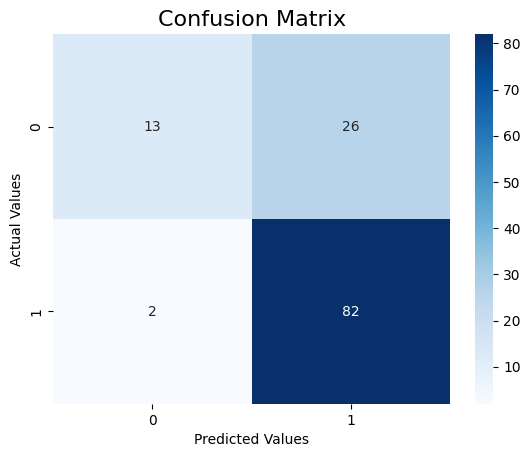

In [ ]:
cm=confusion_matrix(y_test,x_test_pred)
cm